In [4]:
!pip install matplotlib seaborn


     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     -------------- ---------------------- 41.0/104.6 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 104.6/104.6 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB 991.0 kB/s eta 0:00:09
   ---------------------------------------- 0.0/8.1 MB 991.0 kB/s eta 0:00:09
    --------------------------------------- 0.2/8.1 MB 1.2 MB/s eta 0:00:07
   - -------------------------------------- 0.2/8.1 MB 1.3 MB/s eta 0:00:07
   - -------------------------------------- 0.2/8.1 MB 1.3 MB/s eta 0:00:07
   - -------------------------------------- 0.3/8.1 MB 1.2 MB/s eta 0:00:07
   - -------------------------------------- 0.4/8.1 MB 1.2 MB/s eta 0:00:07
   -- ------------------------------------- 0.4/8.1 MB 1.3 MB/s eta 0:00:07
   -- ------------------------------------- 0.5/8.1 MB 1.2 MB/s eta 0:00:07
   -- ----


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [15]:
# Load and clean the dataset
def load_data():
    # Load all 4 CSV files (change names if necessary)
    vpn_120 = pd.read_csv('TimeBasedFeatures-Dataset-120s-VPN.csv')
    nonvpn_120 = pd.read_csv('TimeBasedFeatures-Dataset-120s-NO-VPN.csv')
    vpn_60 = pd.read_csv('TimeBasedFeatures-Dataset-60s-VPN.csv')
    nonvpn_60 = pd.read_csv('TimeBasedFeatures-Dataset-60s-NO-VPN.csv')

    # Add labels
    vpn_120['is_vpn'] = 1
    vpn_60['is_vpn'] = 1
    nonvpn_120['is_vpn'] = 0
    nonvpn_60['is_vpn'] = 0

    # Combine datasets
    data = pd.concat([vpn_120, vpn_60, nonvpn_120, nonvpn_60], ignore_index=True)

    # Drop unnecessary columns
    data.drop(columns=['Unnamed: 0'], errors='ignore', inplace=True)

    # Drop non-numeric or identifier columns (like 'Label', etc.)
    for col in data.columns:
        if data[col].dtype == 'object':
            print(f"Dropping non-numeric column: {col}")
            data.drop(columns=[col], inplace=True)

    # Drop rows with NaNs
    data.dropna(inplace=True)
    return data

In [16]:
# Load and preprocess
data = load_data()
X = data.drop(columns=['is_vpn'])
y = data['is_vpn']

Dropping non-numeric column: Unnamed: 1


In [17]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [19]:
# SVM model training
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

SVC()

In [20]:
# Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


🎯 Accuracy: 53.13%

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.94      0.67      3405
           1       0.59      0.09      0.16      3170

    accuracy                           0.53      6575
   macro avg       0.56      0.52      0.42      6575
weighted avg       0.56      0.53      0.43      6575



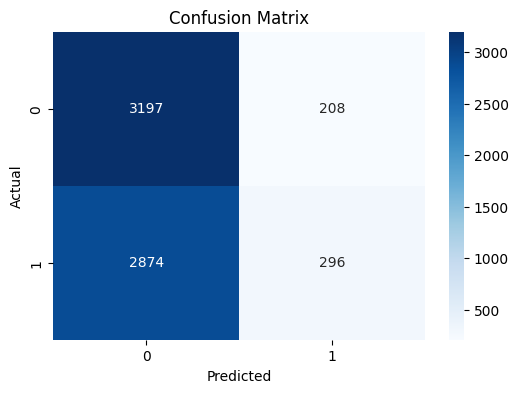

In [21]:
# Confusion matrix plot
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()